## 注释文档



该脚本用于读取CSV文件并绘制不同参数组合下的折线图，主要用于分析量子计算中的门保真度等指标。

1. 导入所需的库
    - turtle: 用于绘图
    - pandas: 用于数据处理
    - matplotlib.pyplot: 用于绘图
    - numpy: 用于数值计算
    - os: 用于文件和目录操作
    - seaborn: 用于美化绘图

2. 读取CSV文件
    - 使用pandas读取数据文件，数据文件路径为'/data/home/scv7454/run/GraduationProject/Data/PXP_scaling_multi_sample.csv'

3. 定义参数字典
    - 包含样本数、演化数、纠缠维度、时间间隔、训练集类型和损失类型等参数

4. 定义绘图所需的变量
    - x轴和y轴的名称列表
    - 演化数和训练集类型的列表

5. 定义数据类型
    - 为数据框中的每一列定义数据类型

6. 绘制折线图
    - 对于每个y轴变量，创建一个新的图形
    - 遍历训练集类型和演化数，过滤数据并计算均值和标准差
    - 绘制带有误差线的折线图，并进行线性拟合
    - 保存图形到指定路径

7. 绘制斜率图
    - 对演化数取对数并进行线性拟合
    - 绘制原始斜率和拟合曲线，并保存图形

注意：在绘图过程中，所有生成的图形都会保存到'/data/home/scv7454/run/GraduationProject/pics/PXP/LineChartOfLength/{}/'目录下。

In [22]:
import itertools

def get_unrecognized_columns(file_path):
    import pandas as pd

    # 读取CSV文件
    data = pd.read_csv(file_path)

    # 定义已知的列名
    known_columns = [
        'length', 'time_interval', 'evol_num', 'sample_num', 
        'train_set_type', 'entangle_dim', 'loss', 'data_type',
        'gate_fidelity', 'spectrum_diff', 'H_diff', 
        'train_loss', 'test_loss', 'train_fidelity', 'test_fidelity',
        'train_fide', 'test_fide', 'similarity'
    ]

    # 定义数据列名
    data_columns = [
        'gate_fidelity', 'spectrum_diff', 'H_diff', 
        'train_loss', 'test_loss', 'train_fide', 'test_fide', 'similarity'
    ]

    # 获取未识别的列名
    unrecognized_columns = [col for col in data.columns if col not in known_columns]

    # 分析已知列的不同值
    unique_values = {col: data[col].unique().tolist() for col in data.columns if col not in data_columns}

    return unrecognized_columns, unique_values

# Example usage:
unrecognized_cols, unique_vals = get_unrecognized_columns('/data/home/scv7454/run/GraduationProject/Data/xorX_(J=1.0)(delta=0.0)(lambda=1.0).csv')
print(unrecognized_cols)
print(unique_vals)

# 获取所有键的值组合
# unique_vals.remove('sample_num')
def generate_combinations(unique_vals, x_axis='sample_num'):
    if x_axis in unique_vals:
        unique_vals.pop(x_axis)
    
    different_key = []
    for key, value in unique_vals.items():
        if len(value) > 1:
            different_key.append(key)
    
    values_list = unique_vals.values()
    keys_list = unique_vals.keys()
    combinations = list(itertools.product(*values_list))

    # 创建字典的列表以存储组合
    combinations_dict_list = []
    for combo in combinations:
        combo_dict = {key: value for key, value in zip(keys_list, combo)}
        combinations_dict_list.append(combo_dict)
    
    return combinations_dict_list, different_key

# Example usage:
combinations_dict_list, different_key = generate_combinations(unique_vals)

for comb in combinations_dict_list:
    print(comb)
print(different_key)

['model_name', 'loss_type', 'J', 'delta', 'lambda']
{'model_name': ['xorX'], 'length': [10], 'evol_num': [1], 'sample_num': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'time_interval': [0.2], 'loss_type': ['fidelity', 'multi_mags'], 'data_type': ['product', 'xorX'], 'J': [1.0], 'delta': [0.0], 'lambda': [1.0]}
{'model_name': 'xorX', 'length': 10, 'evol_num': 1, 'time_interval': 0.2, 'loss_type': 'fidelity', 'data_type': 'product', 'J': 1.0, 'delta': 0.0, 'lambda': 1.0}
{'model_name': 'xorX', 'length': 10, 'evol_num': 1, 'time_interval': 0.2, 'loss_type': 'fidelity', 'data_type': 'xorX', 'J': 1.0, 'delta': 0.0, 'lambda': 1.0}
{'model_name': 'xorX', 'length': 10, 'evol_num': 1, 'time_interval': 0.2, 'loss_type': 'multi_mags', 'data_type': 'product', 'J': 1.0, 'delta': 0.0, 'lambda': 1.0}
{'model_name': 'xorX', 'length': 10, 'evol_num': 1, 'time_interval': 0.2, 'loss_type': 'multi_mags', 'data_type': 'xorX', 'J': 1.0, 'delta': 0.0, 'lambda': 1.0}
['loss_type', 'data_type']


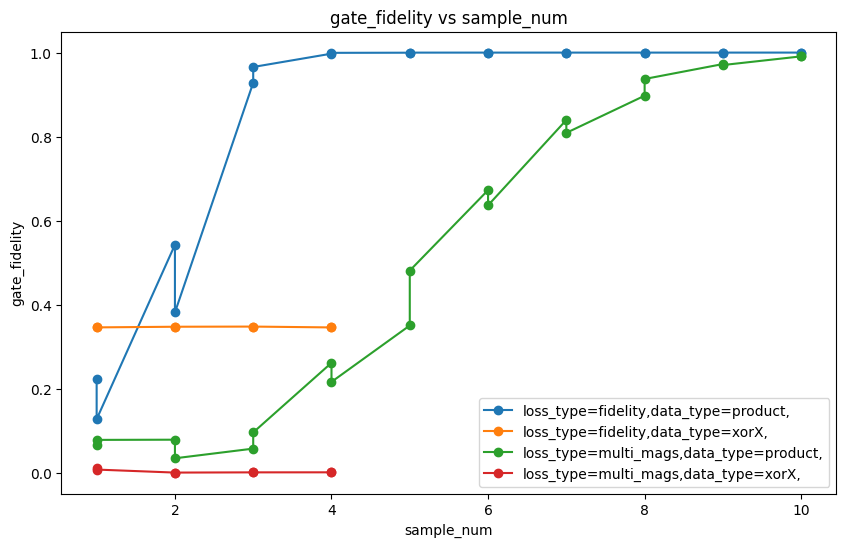

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_data_custom(fig, file_path, para_dict, x_axis, y_axis, label_list):
    # 获取当前的 Axes
    ax = fig.gca()

    # 读取CSV文件
    data = pd.read_csv(file_path)

    # 根据para_dict筛选数据
    for key, value in para_dict.items():
        data = data[data[key] == value]

    label = ''
    for key in label_list:
        label += f'{key}={para_dict[key]},'
    label.rstrip()
    # 在指定的 Axes 上绘制图形
    ax.plot(data[x_axis], data[y_axis], marker='o', label=label)
    ax.set_title(f'{y_axis} vs {x_axis}')
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
    ax.grid()
    ax.legend()  # 显示图例

    # 返回绘制后的 fig 对象
    return fig

# 创建初始图形
fig = plt.figure(figsize=(10, 6))

file_path = '/data/home/scv7454/run/GraduationProject/Data/xorX_(J=1.0)(delta=0.1)(lambda=1.0).csv'

# Example usage:

unrecognized_cols, unique_vals = get_unrecognized_columns(file_path)
combinations_dict_list, different_key = generate_combinations(unique_vals)
# combinations_dict_list = generate_combinations(unique_vals)

for para_dict in combinations_dict_list:
    fig = plot_data_custom(fig, file_path, para_dict, 'sample_num', 'gate_fidelity', label_list=different_key)

plt.show()  # 最后显示图形

In [ ]:
file_path = '/data/home/scv7454/run/GraduationProject/Data/PXP_scaling_multi_sample.csv'
unrecognized_cols, unique_vals = get_unrecognized_columns(file_path)

print("Unrecognized Columns:", unrecognized_cols)
print("Unique Values:", unique_vals)

# You can now use the recognized columns and unique values for plotting
# For example, you might want to plot using the recognized columns
# Assuming you want to plot 'length' against 'gate_fidelity'
plot_data_custom(file_path, x_axis='length', y_axis_list=['gate_fidelity'])
